<a href="https://colab.research.google.com/github/MLcmore2023/MLcmore2023/blob/main/day4_pm_afternoon/keras-demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN using `Keras` library

This tutorial will demonstrate image classification using the `Keras` library. This library allows for GPU acceleration. By utilizing GPUs, Keras significantly speeds up the training process, enabling the parallel processing of matrix operations involved in CNNs, resulting in faster and improved performance when training on large datasets like MNIST.





### Import libraries and initialize random generator

In [1]:
import numpy as np
import keras
import tensorflow
np.random.seed(0)

A GPU (Graphics Processing Unit) is crucial for training CNN on large dataset due to its ability to perform parallel computations efficiently. CNNs involve lots of matrix operations, such as convolutions and pooling, which can be computationally intensive. GPUs excel at executing these operations simultaneously across multiple cores, dramatically accelerating the training process compared to a CPU. The parallel nature of GPUs allows for faster gradient calculations during backpropagation, leading to quicker weight updates and convergence to an optimal solution. Thus, the GPU's parallel processing capabilities significantly reduce the training time, making it an indispensable tool for effectively training CNNs on large datasets like MNIST.

<img src="https://m.media-amazon.com/images/I/7141EnOzClL.jpg" width=30%>



To enable GPU, click on `Runtime` and `Change runtime type` (see screenshot below). Select `T4 GPU`.

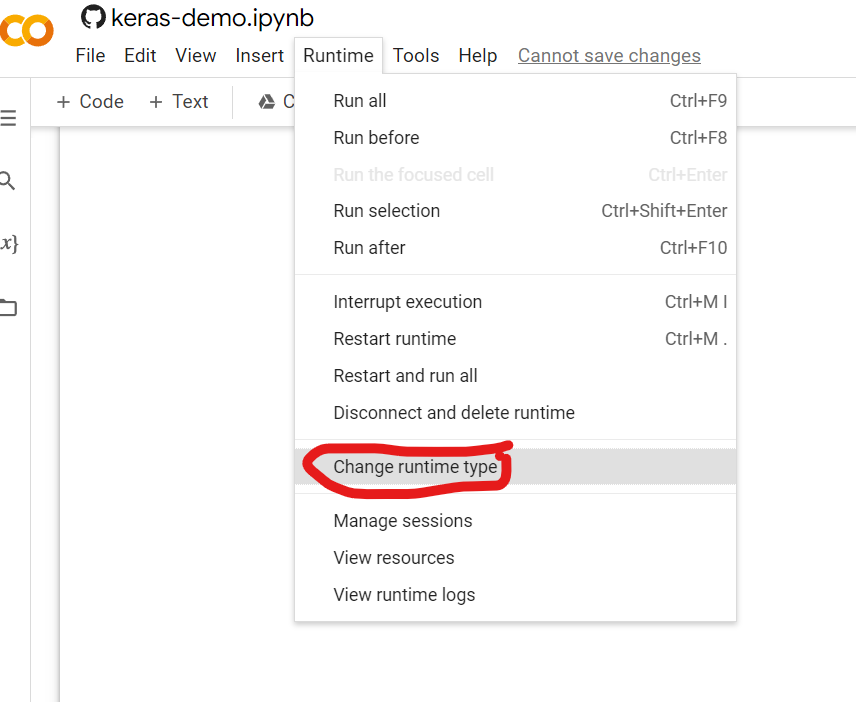

In [17]:
# Check GPU availability
!nvidia-smi -L

# make sure below says `GPU 0: Tesla T4`

GPU 0: Tesla T4 (UUID: GPU-c82ed49b-d384-7457-90ba-e75f196d5ccf)


In [13]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


### Read data using Keras

In [3]:
# Load the MNIST dataset
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [4]:
# Preprocess the data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

### Create the CNN model


In [15]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))


In [6]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model using GPU acceleration
with tf.device('/device:GPU:0'):
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

Epoch 1/10
300/300 - 16s - loss: 0.3253 - accuracy: 0.9159 - val_loss: 0.1371 - val_accuracy: 0.9648 - 16s/epoch - 55ms/step
Epoch 2/10
300/300 - 1s - loss: 0.1034 - accuracy: 0.9732 - val_loss: 0.0795 - val_accuracy: 0.9772 - 1s/epoch - 5ms/step
Epoch 3/10
300/300 - 1s - loss: 0.0607 - accuracy: 0.9847 - val_loss: 0.0625 - val_accuracy: 0.9806 - 1s/epoch - 4ms/step
Epoch 4/10
300/300 - 1s - loss: 0.0415 - accuracy: 0.9900 - val_loss: 0.0512 - val_accuracy: 0.9836 - 1s/epoch - 5ms/step
Epoch 5/10
300/300 - 2s - loss: 0.0292 - accuracy: 0.9933 - val_loss: 0.0491 - val_accuracy: 0.9837 - 2s/epoch - 6ms/step
Epoch 6/10
300/300 - 1s - loss: 0.0207 - accuracy: 0.9959 - val_loss: 0.0461 - val_accuracy: 0.9852 - 1s/epoch - 4ms/step
Epoch 7/10
300/300 - 1s - loss: 0.0149 - accuracy: 0.9975 - val_loss: 0.0468 - val_accuracy: 0.9852 - 1s/epoch - 4ms/step
Epoch 8/10
300/300 - 1s - loss: 0.0104 - accuracy: 0.9987 - val_loss: 0.0451 - val_accuracy: 0.9856 - 1s/epoch - 4ms/step
Epoch 9/10
300/300 - 

In [7]:
# Evaluate the model using GPU acceleration
with tf.device('/device:GPU:0'):
    score = model.evaluate(X_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

Test loss: 0.04535872861742973
Test accuracy: 0.9853000044822693


# Experimentation with models with different layers

In [8]:
# Create the CNN model. No dropout
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model using GPU acceleration
with tf.device('/device:GPU:0'):
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# Evaluate the model using GPU acceleration
with tf.device('/device:GPU:0'):
    score = model.evaluate(X_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

Epoch 1/10
300/300 - 3s - loss: 0.2548 - accuracy: 0.9311 - val_loss: 0.0868 - val_accuracy: 0.9743 - 3s/epoch - 11ms/step
Epoch 2/10
300/300 - 1s - loss: 0.0733 - accuracy: 0.9786 - val_loss: 0.0608 - val_accuracy: 0.9813 - 1s/epoch - 4ms/step
Epoch 3/10
300/300 - 1s - loss: 0.0507 - accuracy: 0.9850 - val_loss: 0.0535 - val_accuracy: 0.9818 - 1s/epoch - 4ms/step
Epoch 4/10
300/300 - 2s - loss: 0.0392 - accuracy: 0.9883 - val_loss: 0.0470 - val_accuracy: 0.9843 - 2s/epoch - 5ms/step
Epoch 5/10
300/300 - 2s - loss: 0.0299 - accuracy: 0.9909 - val_loss: 0.0434 - val_accuracy: 0.9863 - 2s/epoch - 6ms/step
Epoch 6/10
300/300 - 2s - loss: 0.0218 - accuracy: 0.9938 - val_loss: 0.0415 - val_accuracy: 0.9869 - 2s/epoch - 6ms/step
Epoch 7/10
300/300 - 2s - loss: 0.0168 - accuracy: 0.9953 - val_loss: 0.0437 - val_accuracy: 0.9863 - 2s/epoch - 6ms/step
Epoch 8/10
300/300 - 2s - loss: 0.0123 - accuracy: 0.9967 - val_loss: 0.0392 - val_accuracy: 0.9882 - 2s/epoch - 8ms/step
Epoch 9/10
300/300 - 2s

In [9]:
# Create the CNN model. No dropout. no pooling
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model using GPU acceleration
with tf.device('/device:GPU:0'):
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# Evaluate the model using GPU acceleration
with tf.device('/device:GPU:0'):
    score = model.evaluate(X_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

Epoch 1/10
300/300 - 3s - loss: 0.2107 - accuracy: 0.9403 - val_loss: 0.0818 - val_accuracy: 0.9760 - 3s/epoch - 9ms/step
Epoch 2/10
300/300 - 1s - loss: 0.0600 - accuracy: 0.9822 - val_loss: 0.0571 - val_accuracy: 0.9802 - 1s/epoch - 4ms/step
Epoch 3/10
300/300 - 2s - loss: 0.0360 - accuracy: 0.9892 - val_loss: 0.0479 - val_accuracy: 0.9842 - 2s/epoch - 6ms/step
Epoch 4/10
300/300 - 1s - loss: 0.0220 - accuracy: 0.9937 - val_loss: 0.0494 - val_accuracy: 0.9845 - 1s/epoch - 5ms/step
Epoch 5/10
300/300 - 1s - loss: 0.0148 - accuracy: 0.9956 - val_loss: 0.0475 - val_accuracy: 0.9852 - 1s/epoch - 4ms/step
Epoch 6/10
300/300 - 1s - loss: 0.0090 - accuracy: 0.9975 - val_loss: 0.0500 - val_accuracy: 0.9857 - 1s/epoch - 4ms/step
Epoch 7/10
300/300 - 1s - loss: 0.0046 - accuracy: 0.9990 - val_loss: 0.0547 - val_accuracy: 0.9855 - 1s/epoch - 4ms/step
Epoch 8/10
300/300 - 1s - loss: 0.0034 - accuracy: 0.9994 - val_loss: 0.0518 - val_accuracy: 0.9860 - 1s/epoch - 4ms/step
Epoch 9/10
300/300 - 1s 

In [10]:
# Create the CNN model. No dropout. no pooling
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model using GPU acceleration
with tf.device('/device:GPU:0'):
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# Evaluate the model using GPU acceleration
with tf.device('/device:GPU:0'):
    score = model.evaluate(X_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

Epoch 1/10
300/300 - 3s - loss: 0.3198 - accuracy: 0.9155 - val_loss: 0.1313 - val_accuracy: 0.9645 - 3s/epoch - 9ms/step
Epoch 2/10
300/300 - 1s - loss: 0.0988 - accuracy: 0.9741 - val_loss: 0.0781 - val_accuracy: 0.9774 - 1s/epoch - 4ms/step
Epoch 3/10
300/300 - 1s - loss: 0.0583 - accuracy: 0.9854 - val_loss: 0.0598 - val_accuracy: 0.9813 - 1s/epoch - 4ms/step
Epoch 4/10
300/300 - 2s - loss: 0.0389 - accuracy: 0.9904 - val_loss: 0.0517 - val_accuracy: 0.9826 - 2s/epoch - 5ms/step
Epoch 5/10
300/300 - 2s - loss: 0.0270 - accuracy: 0.9938 - val_loss: 0.0469 - val_accuracy: 0.9839 - 2s/epoch - 5ms/step
Epoch 6/10
300/300 - 1s - loss: 0.0189 - accuracy: 0.9965 - val_loss: 0.0445 - val_accuracy: 0.9847 - 1s/epoch - 4ms/step
Epoch 7/10
300/300 - 1s - loss: 0.0137 - accuracy: 0.9978 - val_loss: 0.0435 - val_accuracy: 0.9854 - 1s/epoch - 4ms/step
Epoch 8/10
300/300 - 1s - loss: 0.0098 - accuracy: 0.9988 - val_loss: 0.0429 - val_accuracy: 0.9853 - 1s/epoch - 4ms/step
Epoch 9/10
300/300 - 1s 

In [11]:
# Create the CNN model. No dropout. no pooling
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model using GPU acceleration
with tf.device('/device:GPU:0'):
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# Evaluate the model using GPU acceleration
with tf.device('/device:GPU:0'):
    score = model.evaluate(X_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

Epoch 1/10
300/300 - 3s - loss: 0.3285 - accuracy: 0.9152 - val_loss: 0.1316 - val_accuracy: 0.9651 - 3s/epoch - 11ms/step
Epoch 2/10
300/300 - 2s - loss: 0.0988 - accuracy: 0.9745 - val_loss: 0.0759 - val_accuracy: 0.9787 - 2s/epoch - 6ms/step
Epoch 3/10
300/300 - 1s - loss: 0.0598 - accuracy: 0.9846 - val_loss: 0.0594 - val_accuracy: 0.9815 - 1s/epoch - 4ms/step
Epoch 4/10
300/300 - 1s - loss: 0.0399 - accuracy: 0.9902 - val_loss: 0.0528 - val_accuracy: 0.9825 - 1s/epoch - 4ms/step
Epoch 5/10
300/300 - 2s - loss: 0.0271 - accuracy: 0.9942 - val_loss: 0.0483 - val_accuracy: 0.9853 - 2s/epoch - 6ms/step
Epoch 6/10
300/300 - 2s - loss: 0.0195 - accuracy: 0.9962 - val_loss: 0.0433 - val_accuracy: 0.9851 - 2s/epoch - 6ms/step
Epoch 7/10
300/300 - 2s - loss: 0.0137 - accuracy: 0.9979 - val_loss: 0.0420 - val_accuracy: 0.9865 - 2s/epoch - 5ms/step
Epoch 8/10
300/300 - 1s - loss: 0.0094 - accuracy: 0.9988 - val_loss: 0.0427 - val_accuracy: 0.9857 - 1s/epoch - 4ms/step
Epoch 9/10
300/300 - 1s

In [18]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1)))
model.add(Activation("tanh"))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("tanh"))
model.add(Dense(10))
model.add(Activation("softmax"))
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model using GPU acceleration
with tf.device('/device:GPU:0'):
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# Evaluate the model using GPU acceleration
with tf.device('/device:GPU:0'):
    score = model.evaluate(X_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

Epoch 1/10
300/300 - 3s - loss: 0.2538 - accuracy: 0.9248 - val_loss: 0.1540 - val_accuracy: 0.9565 - 3s/epoch - 11ms/step
Epoch 2/10
300/300 - 1s - loss: 0.1312 - accuracy: 0.9625 - val_loss: 0.1210 - val_accuracy: 0.9618 - 1s/epoch - 5ms/step
Epoch 3/10
300/300 - 1s - loss: 0.0985 - accuracy: 0.9716 - val_loss: 0.1073 - val_accuracy: 0.9680 - 1s/epoch - 4ms/step
Epoch 4/10
300/300 - 1s - loss: 0.0773 - accuracy: 0.9780 - val_loss: 0.1000 - val_accuracy: 0.9683 - 1s/epoch - 4ms/step
Epoch 5/10
300/300 - 1s - loss: 0.0618 - accuracy: 0.9830 - val_loss: 0.0884 - val_accuracy: 0.9723 - 1s/epoch - 5ms/step
Epoch 6/10
300/300 - 1s - loss: 0.0503 - accuracy: 0.9864 - val_loss: 0.0910 - val_accuracy: 0.9712 - 1s/epoch - 4ms/step
Epoch 7/10
300/300 - 2s - loss: 0.0415 - accuracy: 0.9888 - val_loss: 0.0884 - val_accuracy: 0.9713 - 2s/epoch - 5ms/step
Epoch 8/10
300/300 - 2s - loss: 0.0334 - accuracy: 0.9917 - val_loss: 0.0885 - val_accuracy: 0.9705 - 2s/epoch - 6ms/step
Epoch 9/10
300/300 - 1s

In [19]:
# Create the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model using GPU acceleration
with tf.device('/device:GPU:0'):
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# Evaluate the model using GPU acceleration
with tf.device('/device:GPU:0'):
    score = model.evaluate(X_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

Epoch 1/10
300/300 - 10s - loss: 0.4016 - accuracy: 0.8722 - val_loss: 0.0581 - val_accuracy: 0.9822 - 10s/epoch - 33ms/step
Epoch 2/10
300/300 - 5s - loss: 0.0997 - accuracy: 0.9732 - val_loss: 0.0414 - val_accuracy: 0.9866 - 5s/epoch - 17ms/step
Epoch 3/10
300/300 - 5s - loss: 0.0686 - accuracy: 0.9821 - val_loss: 0.0313 - val_accuracy: 0.9905 - 5s/epoch - 16ms/step
Epoch 4/10
300/300 - 5s - loss: 0.0533 - accuracy: 0.9860 - val_loss: 0.0284 - val_accuracy: 0.9920 - 5s/epoch - 16ms/step
Epoch 5/10
300/300 - 6s - loss: 0.0494 - accuracy: 0.9865 - val_loss: 0.0204 - val_accuracy: 0.9936 - 6s/epoch - 19ms/step
Epoch 6/10
300/300 - 5s - loss: 0.0367 - accuracy: 0.9902 - val_loss: 0.0259 - val_accuracy: 0.9920 - 5s/epoch - 17ms/step
Epoch 7/10
300/300 - 5s - loss: 0.0352 - accuracy: 0.9902 - val_loss: 0.0230 - val_accuracy: 0.9931 - 5s/epoch - 16ms/step
Epoch 8/10
300/300 - 5s - loss: 0.0318 - accuracy: 0.9910 - val_loss: 0.0174 - val_accuracy: 0.9941 - 5s/epoch - 16ms/step
Epoch 9/10
300

Epoch 1/5
1875/1875 [==============================] - 10s 4ms/step - loss: 0.2597 - accuracy: 0.9259
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1133 - accuracy: 0.9668
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0788 - accuracy: 0.9766
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0597 - accuracy: 0.9812
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0457 - accuracy: 0.9859
Training time on CPU: 42.27 seconds
Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0364 - accuracy: 0.9890
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0297 - accuracy: 0.9911
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0231 - accuracy: 0.9931
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0198 - accuracy: 0.9936
Epoch 5/5
1875/1875 [==============================] 

### Exercise
Write code to make this network:


Input Layer:
- Type: Convolutional Layer
- Filters: 32
- Kernel Size: 3x3
- Activation: ReLU


Hidden Layer 1:
- Type: MaxPooling Layer
- Pool Size: 2x2

Hidden Layer 2:
- Type: Convolutional Layer
- Filters: 64
- Kernel Size: 3x3
- Activation: ReLU
- Padding: Same

Hidden Layer 3:
- Type: MaxPooling Layer
- Pool Size: 2x2
- Flatten Layer:

Hidden Layer 4:
- Type: Dense (Fully Connected) Layer
- Neurons: 128
- Activation: ReLU

Output Layer:
- Type: Dense Layer
- Neurons: 10 (for 10 possible digit classes)
- Activation: Softmax

